<a href="https://colab.research.google.com/github/leonorafrangu/Estimate-of-pi-with-a-Poisson-process/blob/main/Estimate_of_%CF%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimate of π by means of a Poisson process on the plane

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_poisson_process(T, lambd):
    N = np.random.poisson(lambd * T**2)
    if N == 0:
        return []
    else:
        U = np.random.rand(N)
        V = np.random.rand(N)
        points = [(U[i] * T, V[i] * T) for i in range(N)]
        return points

In [ ]:
def estimate_pi(points):
    total_points = len(points)
    if total_points == 0:
        return 0
    points_in_circle = sum(1 for x, y in points if (x - 1/2)**2 + (y - 1/2)**2 <= 1/4)
    pi_estimate = 4 * points_in_circle / total_points
    return pi_estimate

In [ ]:
def simulate_poisson_process(lambda_values):
    pi_estimates = []
    standard_deviations = []
    for lambd in lambda_values:
        pi_values = []
        for i in range(M):
            points = generate_poisson_process(1, lambd)
            pi = estimate_pi(points)
            pi_values.append(pi)

        pi_mean = np.mean(pi_values)
        pi_estimates.append(pi_mean)

        if M > 1:
            standard_deviation = np.std(pi_values) / np.sqrt(M - 1)
        else:
            standard_deviation = 0

        standard_deviations.append(standard_deviation)

    return pi_estimates, standard_deviations

lambda_values = [5 * k for k in range(1, 41)]
M = 1000  # Number of independent realizations

pi_estimates, standard_deviations = simulate_poisson_process(lambda_values)

In [ ]:
print( pi_estimates)

[3.098034731934732, 3.1431762926272215, 3.111962038521446, 3.1388408230262534, 3.129380802562053, 3.1485038525657068, 3.153889673673187, 3.143938578445498, 3.1404615276792054, 3.1362715410053044, 3.145607184097498, 3.147351641747638, 3.147754978890871, 3.142065562383183, 3.1474369234552624, 3.1367815272397452, 3.1514419958884776, 3.142678088127136, 3.143988571435263, 3.1446660560680577, 3.1463032999336664, 3.134388590611665, 3.135788705921521, 3.134595759629979, 3.133040432601727, 3.1472688187257734, 3.1467652810667532, 3.1417951814069287, 3.14196285265213, 3.1417235602769447, 3.1401969284591025, 3.1413969023189536, 3.1389439525670384, 3.144800903815065, 3.148165744373956, 3.1402300028491825, 3.145590156789258, 3.138541067411912, 3.1399308199797016, 3.146049090825354]


In [ ]:
print(standard_deviations)

[0.026217040458432428, 0.016803563673725753, 0.014082293980573805, 0.011612855835421841, 0.010641254910321385, 0.009689906233157946, 0.00888472544750418, 0.008003110277208254, 0.007830687772798614, 0.00726046352287289, 0.007168490696302718, 0.0065265163707637994, 0.006499739729370283, 0.005991004605176675, 0.005888018218831598, 0.005998178883475215, 0.005253163578393361, 0.005604144819995303, 0.005308945324506803, 0.005247595391683349, 0.005108336223081262, 0.004754500783231549, 0.004810914270390334, 0.004810930911325963, 0.004690779512361204, 0.004485209630715044, 0.0043514044751983855, 0.0044954000703429815, 0.00445165957048816, 0.0042304087833954515, 0.004080262129184476, 0.0040022438047061255, 0.00409891290584746, 0.004076714089795203, 0.0038943620565138957, 0.00371013291850585, 0.003959994690530612, 0.0038112249527400073, 0.0038181559087567723, 0.0036711314540508397]


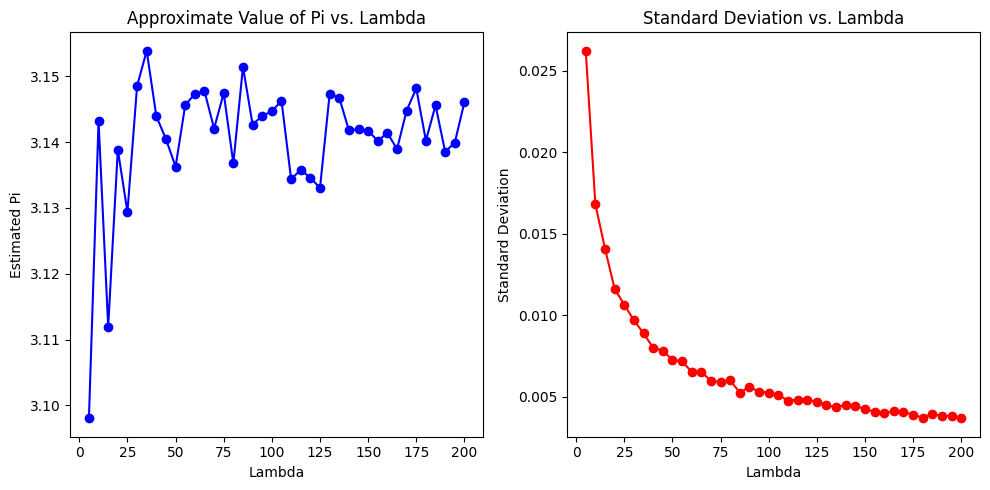

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(lambda_values, pi_estimates, 'bo-')
plt.xlabel('Lambda')
plt.ylabel('Estimated Pi')
plt.title('Approximate Value of Pi vs. Lambda')

plt.subplot(1, 2, 2)
plt.plot(lambda_values, standard_deviations, 'ro-')
plt.xlabel('Lambda')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation vs. Lambda')

plt.tight_layout()
plt.show()